<a href="https://colab.research.google.com/github/Parthsarthi-lab/Machine-Learning-Projects/blob/main/Boston_Ridge%26Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.datasets import load_boston

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
bos_x = pd.DataFrame(boston.data)
bos_y = pd.DataFrame(boston.target)
bos = pd.concat([bos_x,bos_y],axis=1)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
bos.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT','PRICING']
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICING'],
      dtype='object')

In [ ]:
x = bos.drop('PRICING',axis=1)
y = bos.PRICING

## I think the best model is of Ridge Regression with high R2 value and slightly higher RMSE

In [ ]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
print('Coefficients \n',lm.coef_)
print('Intercept:  ',lm.intercept_)
print('RMSE :\t\t',sqrt(mean_squared_error(ytest,lm.predict(xtest))))
list(zip(bos.columns,lm.coef_))

Coefficients 
 [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
Intercept:   31.63108403569163
RMSE :		 4.638689926172867


[('CRIM', -0.1334701028529461),
 ('ZN', 0.03580891359323195),
 ('INDUS', 0.04952264522005543),
 ('CHAS', 3.119835116285394),
 ('NOX', -15.417060895306689),
 ('RM', 4.057199231645403),
 ('AGE', -0.010820835184926221),
 ('DIS', -1.3859982431608788),
 ('RAD', 0.24272733982224926),
 ('TAX', -0.00870223436566183),
 ('PTRATIO', -0.9106852081102881),
 ('B', 0.011794115892575632),
 ('LSTAT', -0.5471133128239569)]

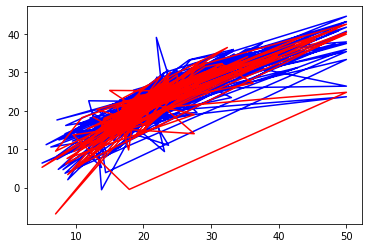

In [ ]:
prediction = lm.predict(xtrain)
preds = lm.predict(xtest)

plt.plot(ytrain,prediction,color='blue')
plt.plot(ytest,preds,color='red')

In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
re = Ridge(alpha=0.001,normalize=True)
re.fit(xtrain,ytrain)

print('RMSE :\t\t',sqrt(mean_squared_error(ytrain,re.predict(xtrain))))
print('RMSE :\t\t',sqrt(mean_squared_error(ytest,re.predict(xtest))))
print('R2 SCORE : {}'.format(re.score(xtest,ytest)))
print()
list(zip(bos.columns,re.coef_))

RMSE :		 4.748229167712649
RMSE :		 4.639881960030266
R2 SCORE : 0.7110775704734211



[('CRIM', -0.13293095143443087),
 ('ZN', 0.035484221870994925),
 ('INDUS', 0.048001232557285216),
 ('CHAS', 3.127579829800183),
 ('NOX', -15.304785915319183),
 ('RM', 4.060286768928031),
 ('AGE', -0.01085637780952374),
 ('DIS', -1.379225685316827),
 ('RAD', 0.23929865107586262),
 ('TAX', -0.008546440328902649),
 ('PTRATIO', -0.908903209304222),
 ('B', 0.01178265911380543),
 ('LSTAT', -0.5463796558648037)]

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.001,normalize=True)
la.fit(xtrain,ytrain)

print('RMSE :\t\t',sqrt(mean_squared_error(ytrain,la.predict(xtrain))))
print('RMSE :\t\t',sqrt(mean_squared_error(ytest,la.predict(xtest))))
print('R2 SCORE : {}'.format(la.score(xtest,ytest)))
print()
list(zip(bos.columns,la.coef_))

RMSE :		 4.750900452460059
RMSE :		 4.650355164208201
R2 SCORE : 0.7097717791957663



[('CRIM', -0.1265465631296469),
 ('ZN', 0.03162929101056302),
 ('INDUS', 0.02367002518659898),
 ('CHAS', 3.152913571838332),
 ('NOX', -14.288127479538577),
 ('RM', 4.0650426722638215),
 ('AGE', -0.009548513274010672),
 ('DIS', -1.3235625663474062),
 ('RAD', 0.20303366215157068),
 ('TAX', -0.006685635388838494),
 ('PTRATIO', -0.8937554288932613),
 ('B', 0.011517293820193956),
 ('LSTAT', -0.5474593242838064)]

In [ ]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
el = ElasticNet(alpha=0.001,normalize=True)
el.fit(xtrain,ytrain)

print('RMSE :\t\t',sqrt(mean_squared_error(ytrain,el.predict(xtrain))))
print('RMSE :\t\t',sqrt(mean_squared_error(ytest,el.predict(xtest))))
print('R2 SCORE : {}'.format(el.score(xtest,ytest)))
print()
list(zip(bos.columns,el.coef_))

RMSE :		 4.889469204050735
RMSE :		 4.790286847734995
R2 SCORE : 0.6920427488791856



[('CRIM', -0.09397880393246212),
 ('ZN', 0.016980828011418616),
 ('INDUS', -0.028439479772166817),
 ('CHAS', 3.4872484757839026),
 ('NOX', -6.9366823050359185),
 ('RM', 4.021852568909858),
 ('AGE', -0.010556739059399),
 ('DIS', -0.7578205474769022),
 ('RAD', 0.05790521657489143),
 ('TAX', -0.002418160353774964),
 ('PTRATIO', -0.7401079050314077),
 ('B', 0.01022225259162555),
 ('LSTAT', -0.45401171664327034)]

In [ ]:
if(lm.score(xtest,ytest)>re.score(xtest,ytest)):
    print('YES')
else:
    print('NO')


YES


In [ ]:
if(sqrt(mean_squared_error(ytest,re.predict(xtest))) > sqrt(mean_squared_error(ytest,lm.predict(xtest)))):
    print('YES')
elif(sqrt(mean_squared_error(ytest,re.predict(xtest))) > sqrt(mean_squared_error(ytest,la.predict(xtest)))):
    print('NO')
elif(sqrt(mean_squared_error(ytest,re.predict(xtest))) > sqrt(mean_squared_error(ytest,el.predict(xtest)))):
  print('AH!')
else:
  print('You dont undersatnd ')

YES


In [ ]:
if(sqrt(mean_squared_error(ytest,la.predict(xtest))) < sqrt(mean_squared_error(ytest,lm.predict(xtest)))):
    print('YES')
elif(sqrt(mean_squared_error(ytest,la.predict(xtest))) < sqrt(mean_squared_error(ytest,re.predict(xtest)))):
    print('NO')
elif(sqrt(mean_squared_error(ytest,la.predict(xtest))) > sqrt(mean_squared_error(ytest,el.predict(xtest)))):
  print('AH!')
else:
  print('You dont undersatnd ')

You dont undersatnd 
